In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/BOAZ/금융데이터분석/train.csv')
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/BOAZ/금융데이터분석/val.csv')
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
train_df.shape

(113842, 31)

In [ ]:
val_df.shape

(28462, 32)

In [ ]:
train_df.nunique()

ID     113842
V1     111739
V2     111739
V3     111739
V4     111739
V5     111739
V6     111739
V7     111739
V8     111739
V9     111739
V10    111739
V11    111739
V12    111739
V13    111739
V14    111739
V15    111739
V16    111739
V17    111739
V18    111739
V19    111739
V20    111739
V21    111739
V22    111739
V23    111739
V24    111739
V25    111739
V26    111739
V27    111739
V28    111739
V29     20439
V30     77598
dtype: int64

In [ ]:
val_df.nunique()

ID       28462
V1       28240
V2       28240
V3       28240
V4       28240
V5       28240
V6       28240
V7       28240
V8       28240
V9       28240
V10      28240
V11      28240
V12      28240
V13      28240
V14      28240
V15      28240
V16      28240
V17      28240
V18      28240
V19      28240
V20      28240
V21      28240
V22      28240
V23      28240
V24      28240
V25      28240
V26      28240
V27      28240
V28      28240
V29       8795
V30      25706
Class        2
dtype: int64

In [ ]:
train_df.isna().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
dtype: int64

In [ ]:
val_df.isna().sum()

ID       0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
Class    0
dtype: int64

In [ ]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [ ]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,...,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,...,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,...,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,...,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,...,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


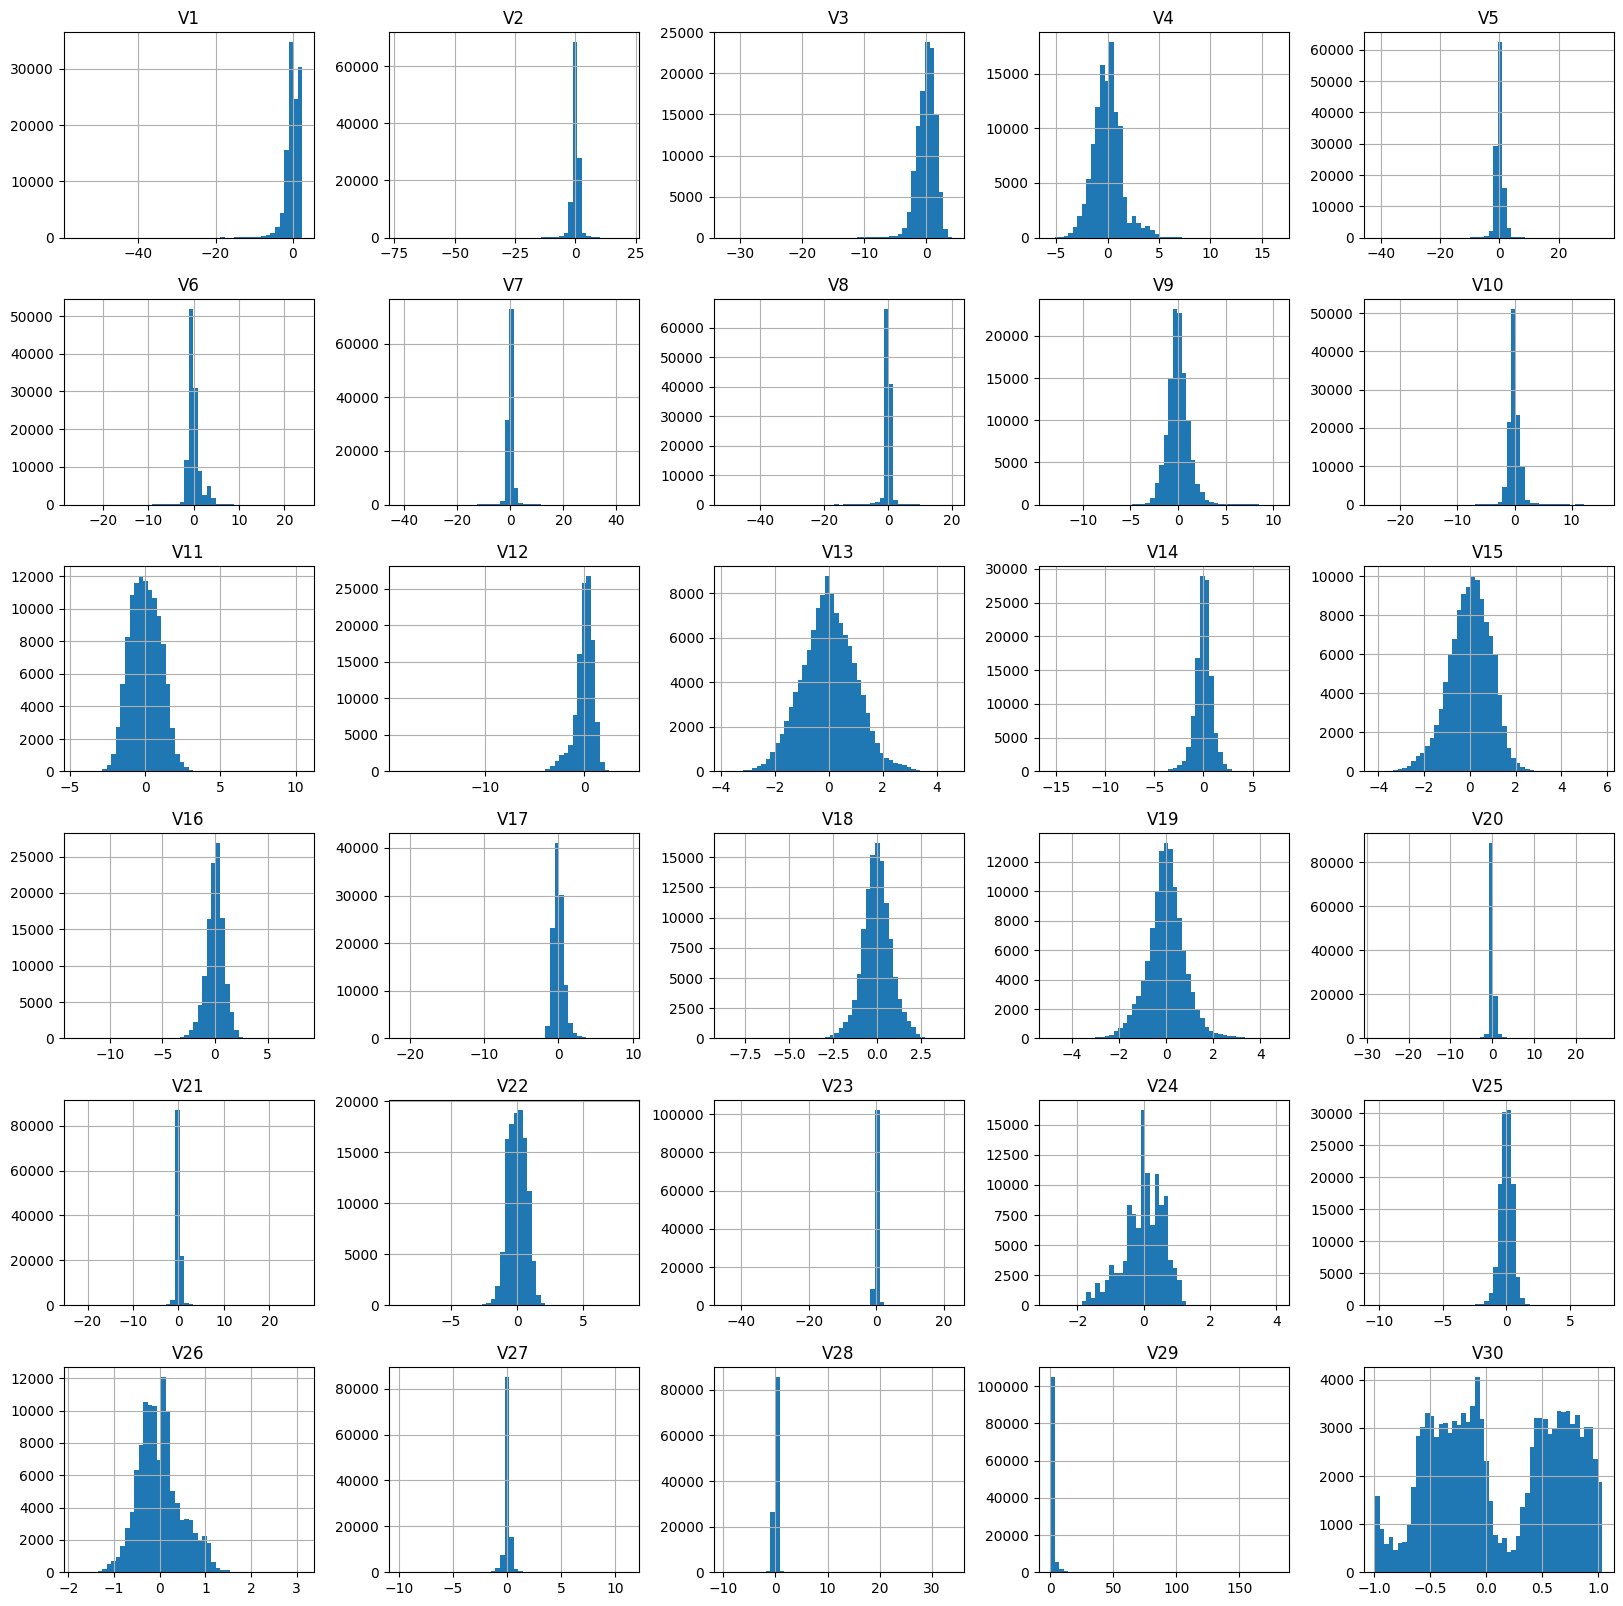

In [ ]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

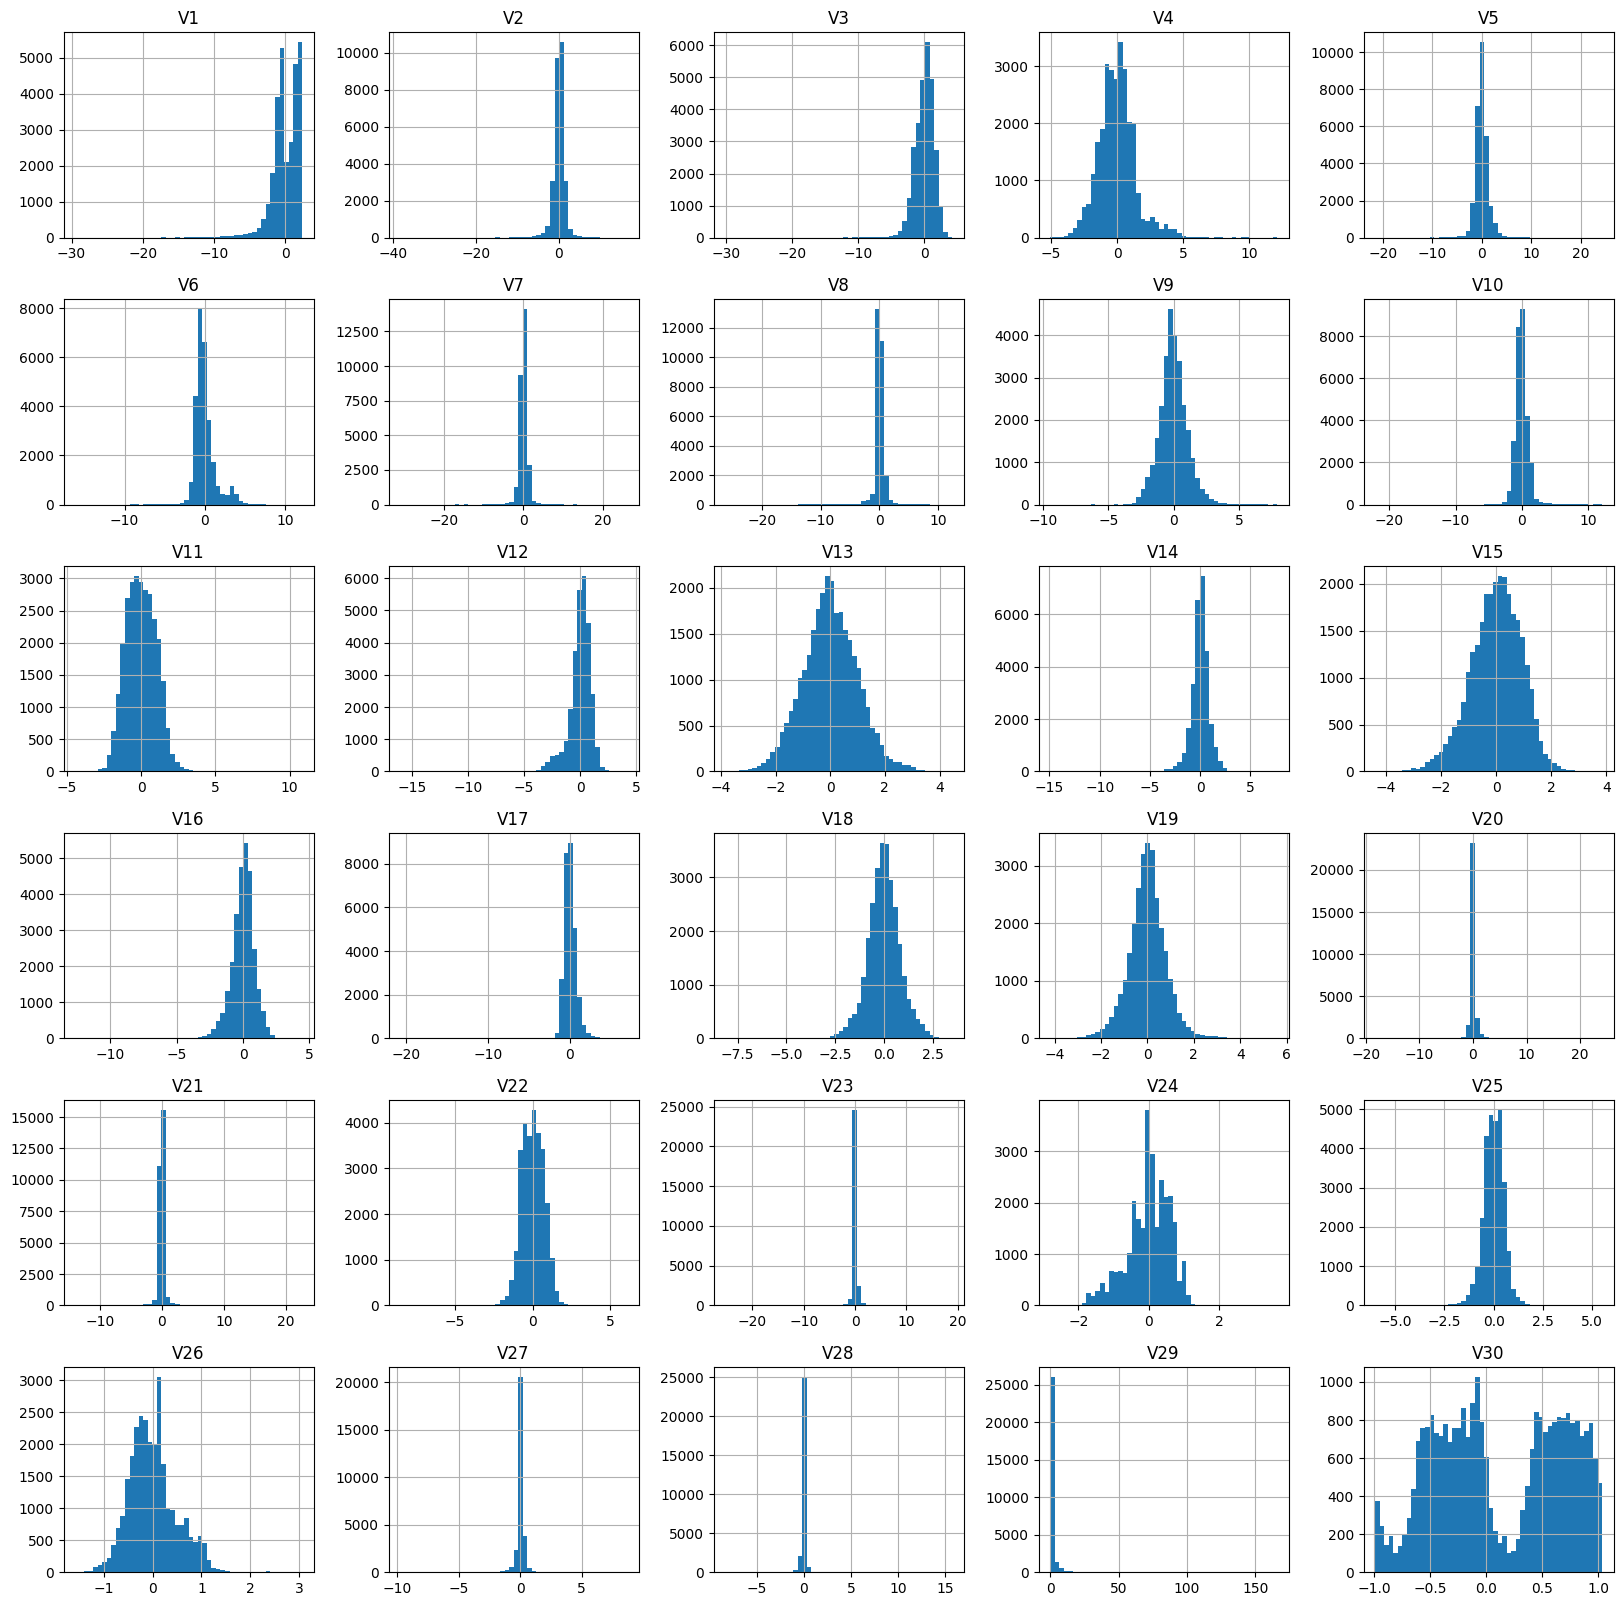

In [ ]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

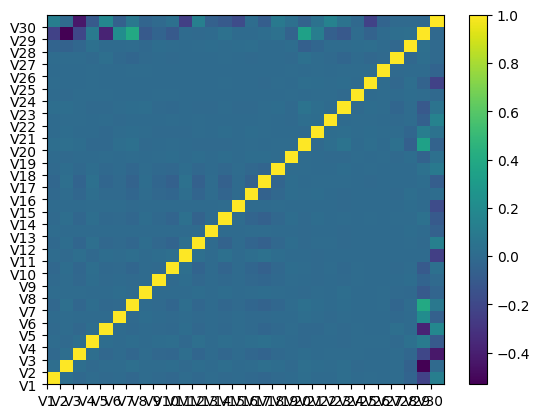

In [ ]:
train_df_ = train_df.drop(columns='ID')
plt.pcolor(train_df_.corr())
plt.xticks(range(len(train_df_.columns)), train_df_.columns)
plt.yticks(range(len(train_df_.columns)), train_df_.columns)
plt.colorbar()
plt.show()

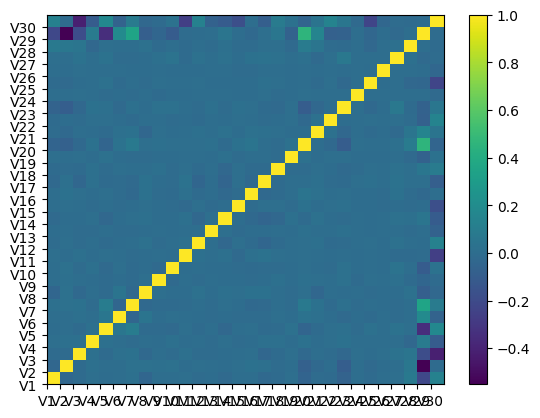

In [ ]:
val_df_ = val_df.drop(columns=['ID','Class'])
plt.pcolor(val_df_.corr())
plt.xticks(range(len(val_df_.columns)), val_df_.columns)
plt.yticks(range(len(val_df_.columns)), val_df_.columns)
plt.colorbar()
plt.show()

In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_df1 = train_df.drop(columns='ID')
train_df1 = pd.DataFrame(std_scaler.fit_transform(train_df1))
train_df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.696317,-0.812481,1.178089,0.271798,-0.368309,1.349308,0.652511,0.210988,-1.380804,0.188955,...,0.345210,1.066111,1.431834,-1.136246,-0.633230,-0.288586,-0.137969,-0.166355,1.188563,-1.990839
1,-0.495358,-0.112967,1.191305,-0.608173,-0.007886,0.933476,0.192541,0.320444,-1.264291,-0.056156,...,-0.148280,0.007285,-0.297148,-1.938909,1.241563,-0.460803,0.157587,0.173998,0.143876,-1.990839
2,-0.218427,0.580982,0.755819,-0.116154,0.307498,-0.026206,0.390690,0.221649,-0.517216,-0.351540,...,-0.286720,-0.773425,-0.039431,-0.611606,-0.450853,0.220818,0.635984,0.229098,-0.346737,-1.990818
3,-0.330318,0.858041,0.711241,-0.345477,0.693558,0.317890,0.925884,-3.209968,0.563699,1.161326,...,2.693508,-1.402900,0.092477,-1.070930,-0.801717,-0.106743,-3.020466,-3.046182,-0.194717,-1.990712
4,-0.458462,0.172537,-0.082109,-0.189262,1.951788,2.793282,0.302611,0.719980,-0.355977,-0.387965,...,-0.099976,-0.370382,-0.319020,1.671161,0.714378,-0.798093,0.029990,0.401295,0.019821,-1.990712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-6.415477,6.169704,-5.669274,-1.774215,-3.354334,-1.051879,-3.021567,4.640268,4.468824,8.074160,...,-1.306812,-2.162159,1.402375,-2.067159,3.432320,0.667510,5.233857,3.463283,-0.321352,1.645815
113838,0.965967,-0.087719,-0.674497,1.069597,-0.026160,-0.465046,0.153202,-0.208020,0.610333,0.107995,...,0.201179,0.876793,-0.064140,-0.086360,0.605158,-0.958774,0.046304,-0.113892,-0.116108,1.645857
113839,-0.124097,0.430608,0.260596,-0.325094,0.178465,-1.013702,0.767042,-0.171877,0.098905,-0.270613,...,-0.315282,-0.710635,0.441651,0.614549,-1.078550,0.235849,0.329761,0.229617,-0.339285,1.645899
113840,0.061566,0.563104,-0.371251,-0.524503,0.826191,-0.181210,0.670168,0.099151,-0.184366,-0.618512,...,-0.433467,-1.117010,0.081219,0.171137,-0.841334,0.258583,0.546111,0.194625,-0.350749,1.645962


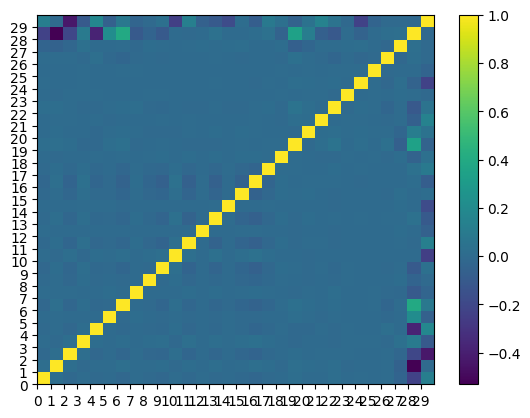

In [ ]:
train_df_1 = train_df1 # StandardScaler 적용
plt.pcolor(train_df_1.corr())
plt.xticks(range(len(train_df_1.columns)), train_df_1.columns)
plt.yticks(range(len(train_df_1.columns)), train_df_1.columns)
plt.colorbar()
plt.show()

In [ ]:
val_df1 = val_df.drop(columns=['ID','Class'])
val_df1 = pd.DataFrame(std_scaler.fit_transform(val_df1))
val_df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.177783,0.696237,0.695431,-0.159474,0.376991,-0.177243,0.554477,0.054839,-0.670890,-0.336130,...,-0.352327,-0.880277,-0.207943,-0.640623,-0.136693,0.193235,0.625880,0.273897,-0.352503,-1.996993
1,0.495973,0.203372,-0.115283,1.499744,0.849011,1.326248,0.087679,0.464405,-1.087624,0.670049,...,0.205443,0.556282,-0.085021,-2.276673,0.737451,0.411398,0.042845,-0.047128,-0.225563,-1.996825
2,0.590777,0.357005,0.128420,1.847750,-0.066092,-0.794541,0.451486,-0.227374,-0.817165,0.700989,...,0.015828,-0.167643,-0.132637,1.143898,1.199001,0.099468,-0.133608,0.054282,-0.225396,-1.996320
3,0.477619,-0.202906,0.257495,0.386148,0.187815,1.290898,-0.371751,0.549468,0.211934,-0.205798,...,-0.057825,0.108320,0.161788,-1.647833,0.157181,0.777498,0.092881,-0.018716,-0.177059,-1.996257
4,-1.559201,1.618597,0.988368,-1.722540,0.232409,-0.624400,1.767959,-1.665917,3.679938,5.581918,...,-1.216132,-0.252992,-0.280983,0.852936,0.254404,0.947893,-0.636024,-3.633134,-0.361769,-1.996088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.285581,0.892104,-0.209816,0.657706,0.394238,-0.424039,0.910229,0.236313,-1.003408,-0.069573,...,0.325529,1.077988,-0.300887,0.048148,0.030552,-0.817898,0.766498,0.571353,-0.215462,1.638566
28458,-0.398574,0.365298,-0.606121,-0.299434,0.678212,-0.575048,0.646280,0.367620,-0.665506,-1.145912,...,0.005017,-0.600413,0.238526,0.971142,-0.385842,0.550371,-0.386657,-0.213684,-0.033923,1.638692
28459,-0.234081,0.810006,-0.113352,0.697228,0.436608,-0.454972,1.071034,-0.952982,-0.377890,0.072753,...,1.215367,0.421500,-0.254364,-0.066428,0.015041,-0.749153,1.277463,0.756499,-0.115321,1.638819
28460,1.053862,-0.110423,-0.798974,0.165600,-0.003554,-0.548558,0.009865,-0.115314,0.403646,0.249019,...,-0.382483,-0.995976,0.504094,-0.598710,-0.603381,0.413772,-0.203704,-0.245844,-0.356677,1.639113


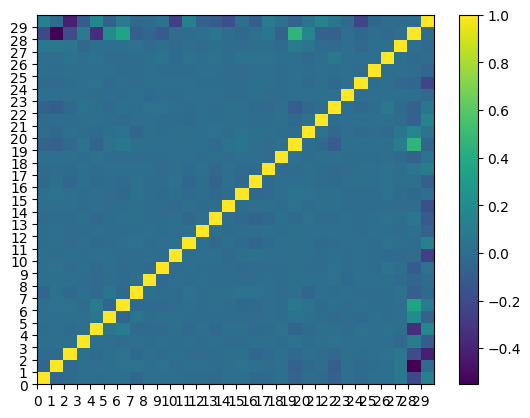

In [ ]:
val_df_1 = val_df1 # StandardScaler 적용
plt.pcolor(val_df_1.corr())
plt.xticks(range(len(val_df_1.columns)), val_df_1.columns)
plt.yticks(range(len(val_df_1.columns)), val_df_1.columns)
plt.colorbar()
plt.show()

In [ ]:
# MinMaxScaler 이용
from sklearn.preprocessing import MinMaxScaler
mmx_scaler = MinMaxScaler()
train_df2 = train_df.drop(columns='ID')
train_df2 = pd.DataFrame(mmx_scaler.fit_transform(train_df2))
train_df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.935217,0.757840,0.934103,0.270706,0.541195,0.558345,0.494362,0.721503,0.500249,0.619375,...,0.460476,0.559957,0.678939,0.311866,0.559515,0.345001,0.467876,0.219901,0.029329,0.000000
1,0.941878,0.770102,0.934643,0.214438,0.547600,0.547297,0.487889,0.723332,0.505606,0.612767,...,0.453344,0.515525,0.662607,0.240850,0.614245,0.328350,0.473490,0.222690,0.009566,0.000000
2,0.951057,0.782268,0.916852,0.245899,0.553205,0.521798,0.490678,0.721681,0.539951,0.604802,...,0.451343,0.482764,0.665042,0.358283,0.564839,0.394253,0.482578,0.223141,0.000284,0.000006
3,0.947348,0.787124,0.915031,0.231235,0.560066,0.530941,0.498209,0.664343,0.589645,0.645592,...,0.494412,0.456349,0.666288,0.317645,0.554597,0.362583,0.413120,0.196306,0.003160,0.000035
4,0.943101,0.775107,0.882621,0.241224,0.582427,0.596712,0.489438,0.730007,0.547364,0.603820,...,0.454042,0.499677,0.662401,0.560251,0.598855,0.295739,0.471066,0.224552,0.007219,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,0.745650,0.880240,0.654373,0.139877,0.488128,0.494546,0.442657,0.795511,0.769177,0.831976,...,0.436602,0.424488,0.678661,0.229503,0.678199,0.437442,0.569919,0.249640,0.000764,0.999954
113838,0.990315,0.770545,0.858421,0.321720,0.547275,0.510138,0.487335,0.714502,0.591789,0.617192,...,0.458394,0.552012,0.664808,0.404754,0.595667,0.280204,0.471376,0.220331,0.004647,0.999965
113839,0.954184,0.779631,0.896621,0.232539,0.550912,0.495560,0.495974,0.715106,0.568277,0.606984,...,0.450931,0.485399,0.669586,0.466767,0.546515,0.395706,0.476761,0.223145,0.000425,0.999977
113840,0.960338,0.781954,0.870809,0.219788,0.562423,0.517680,0.494611,0.719634,0.555254,0.597604,...,0.449223,0.468346,0.666181,0.427537,0.553440,0.397904,0.480871,0.222859,0.000208,0.999994


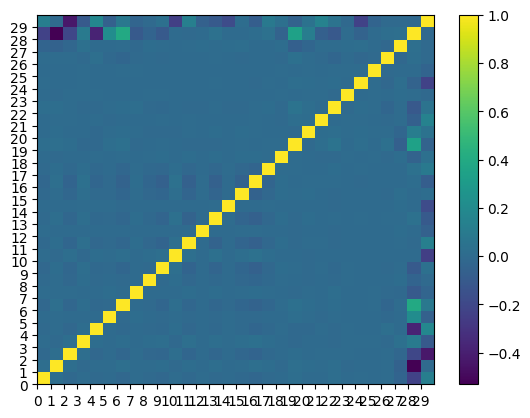

In [ ]:
train_df_2 = train_df2 # MinMaxScaler 적용
plt.pcolor(train_df_2.corr())
plt.xticks(range(len(train_df_2.columns)), train_df_2.columns)
plt.yticks(range(len(train_df_2.columns)), train_df_2.columns)
plt.colorbar()
plt.show()

In [ ]:
val_df2 = val_df.drop(columns=['ID','Class'])
val_df2 = pd.DataFrame(mmx_scaler.fit_transform(val_df2))
val_df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.913867,0.719396,0.907517,0.282153,0.480733,0.562720,0.554520,0.680654,0.501486,0.635252,...,0.375847,0.540890,0.569616,0.374668,0.516025,0.362467,0.542617,0.350658,0.000309,0.000000
1,0.954608,0.704960,0.872176,0.417810,0.494456,0.631366,0.545051,0.692330,0.475360,0.667021,...,0.386527,0.611642,0.571247,0.222067,0.555864,0.385142,0.530194,0.346603,0.002865,0.000046
2,0.960340,0.709460,0.882799,0.446263,0.467851,0.534535,0.552431,0.672609,0.492316,0.667998,...,0.382896,0.575988,0.570615,0.541118,0.576899,0.352721,0.526435,0.347884,0.002869,0.000185
3,0.953498,0.693060,0.888426,0.326763,0.475233,0.629752,0.535731,0.694755,0.556831,0.639367,...,0.381486,0.589579,0.574523,0.280722,0.529418,0.423193,0.531260,0.346962,0.003842,0.000203
4,0.830336,0.746412,0.920286,0.154357,0.476530,0.542304,0.579137,0.631599,0.774244,0.822109,...,0.359308,0.571784,0.568646,0.513979,0.533849,0.440903,0.515730,0.301312,0.000123,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,0.907349,0.725133,0.868055,0.348965,0.481234,0.551452,0.561737,0.685828,0.480640,0.643668,...,0.388826,0.637336,0.568382,0.438913,0.523647,0.257375,0.545613,0.354415,0.003069,0.999826
28458,0.900517,0.709703,0.850779,0.270710,0.489491,0.544557,0.556383,0.689571,0.501823,0.609683,...,0.382689,0.554674,0.575542,0.525004,0.504670,0.399586,0.521043,0.344500,0.006724,0.999861
28459,0.910463,0.722728,0.872260,0.352196,0.482466,0.550039,0.564999,0.651923,0.519854,0.648162,...,0.405864,0.605004,0.568999,0.428226,0.522940,0.264520,0.556500,0.356753,0.005085,0.999896
28460,0.988342,0.695769,0.842372,0.308731,0.469669,0.545766,0.543473,0.675804,0.568850,0.653727,...,0.375270,0.535192,0.579067,0.378578,0.494755,0.385389,0.524941,0.344093,0.000225,0.999977


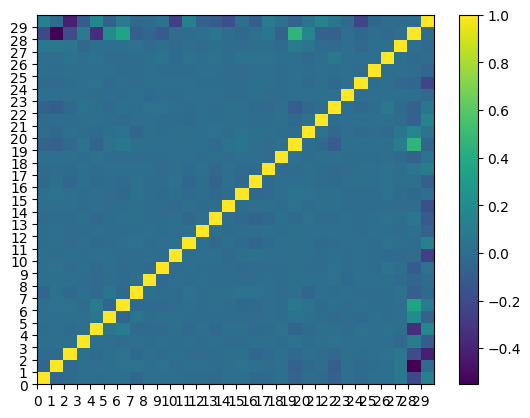

In [ ]:
val_df_2 = val_df2 # MinMaxScaler 적용
plt.pcolor(val_df2.corr())
plt.xticks(range(len(val_df_2.columns)), val_df_2.columns)
plt.yticks(range(len(val_df_2.columns)), val_df_2.columns)
plt.colorbar()
plt.show()

In [ ]:
# Validation set 사기 거래 비율
# Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')